In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Numpy and Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")


In [3]:
#Reading data from 'uber request data.csv' into 'uber' dataframe with 'latin-1' encoding
uber = pd.read_csv('Uber Request Data.csv',encoding = 'latin-1')

In [4]:
#Top Few rows of dataset
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
#Dimensions and summary of columns used in Dataset
print(uber.shape)
print(uber.info())

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None


In [6]:
#Bottom Few rows of dataset
uber.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [7]:
#Converting Date Column "Request timestamp" into Datetime format from object type
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],dayfirst = True)

In [8]:
#Checking the datatype of all columns again
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.2+ KB


In [9]:
#Converting Date Column "Drop timestamp" into Datetime format from object type
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'],dayfirst = True,errors = 'ignore')

uber['Drop timestamp'] = uber['Drop timestamp'].str.replace("/","-")
uber['Drop timestamp'] = uber['Drop timestamp'].str.split(":").str[:2]
uber['Drop timestamp'] = uber['Drop timestamp'].str.join(":")

In [10]:
#Checking the datatype of all columns again
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [11]:
#Checking for null values in each columns
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [12]:
#Calculating rows with any null values
uber.isnull().any(axis =1).sum()

3914

In [13]:
#Chcking for rows with all null values
uber.isnull().all().sum()

0

In [14]:
#Further deep diving into null  records we see that all the null values are either Status Cancelled or No cars available so
#Null values have not to be removed.
uber[np.isnat(uber['Drop timestamp'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaT
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaT
2839,80,City,3.0,Cancelled,2016-07-11 04:47:00,NaT
2840,534,City,3.0,Cancelled,2016-07-11 10:01:00,NaT


In [15]:
#Calculating % of null values in the dataset
round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [16]:
#Converting 'Driver id' into categorical variable from float type as each driver has a unique id.
uber['Driver id'] = uber['Driver id'].astype('category')

In [17]:
#Summary of Driver id column
uber['Driver id'].describe()

count     4095.0
unique     300.0
top         27.0
freq        22.0
Name: Driver id, dtype: float64

In [18]:
#Top Drivers with most statuses either Trip cancelled or Trip Completed
uber['Driver id'].value_counts().head(n=10)

27.0     22
84.0     21
22.0     21
70.0     21
176.0    21
177.0    21
197.0    20
114.0    20
142.0    20
69.0     20
Name: Driver id, dtype: int64

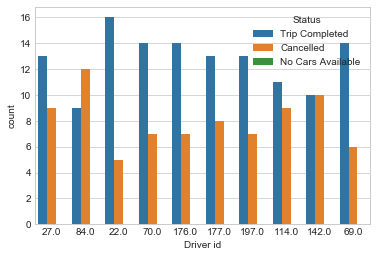

In [19]:
#Drivers with maximum number of Statuses
sns.countplot(x = 'Driver id',data = uber,order =uber['Driver id'].value_counts().iloc[:10].index,hue = 'Status')
plt.show()

In [20]:
#Adding Derived data-metrics like request hour, day and Drop Point etc for better categorization  of 
#data into various bins and seeing the trend.
uber['Request Day'] = pd.DatetimeIndex(uber['Request timestamp']).day
uber['Request Hour'] = pd.DatetimeIndex(uber['Request timestamp']).hour
uber['Drop Hour'] = uber['Drop timestamp'].map(lambda x : pd.Timestamp(x).hour)

In [21]:
#Adding Time slot for every particular time of day like Morning Evening Late night
uber['Time Slot'] = None
uber.loc[uber['Request Hour']<5, 'Time Slot'] = 'Pre Morning'
uber.loc[(uber['Request Hour']>=5) & (uber['Request Hour']<=10), 'Time Slot'] = 'Morning'
uber.loc[(uber['Request Hour']>10) & (uber['Request Hour']<16), 'Time Slot'] = 'Day Time'
uber.loc[(uber['Request Hour']>=16) & (uber['Request Hour']<22), 'Time Slot'] = 'Evening Rush'
uber.loc[uber['Request Hour']>=22, 'Time Slot'] = 'Late Night'

In [22]:
#Deducing  Drop point for every Trip Completed from Pickup Point
uber['Drop Point'] = None
uber.loc[(uber['Status'] == "Trip Completed") & (uber['Pickup point'] == "City"),'Drop Point'] = 'Airport'
uber.loc[(uber['Status'] == "Trip Completed") & (uber['Pickup point'] == "Airport"),'Drop Point'] = 'City'

In [23]:
#Checking the summary of every variables in the dataset
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null category
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request Day          6745 non-null int64
Request Hour         6745 non-null int64
Drop Hour            2831 non-null float64
Time Slot            6745 non-null object
Drop Point           2831 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 552.5+ KB


In [24]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Day,Request Hour,Drop Hour,Time Slot,Drop Point
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,13.0,Day Time,City
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17,18.0,Evening Rush,City
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,9,9.0,Morning,Airport
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21,22.0,Evening Rush,City
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,9.0,Morning,Airport


In [25]:
#Creating a seperate dataframe 'filter_status' from dataset for Trips cancelled or No Cars Available
filter_status = uber[(uber['Status'] == "Cancelled") | (uber['Status'] == "No Cars Available")]

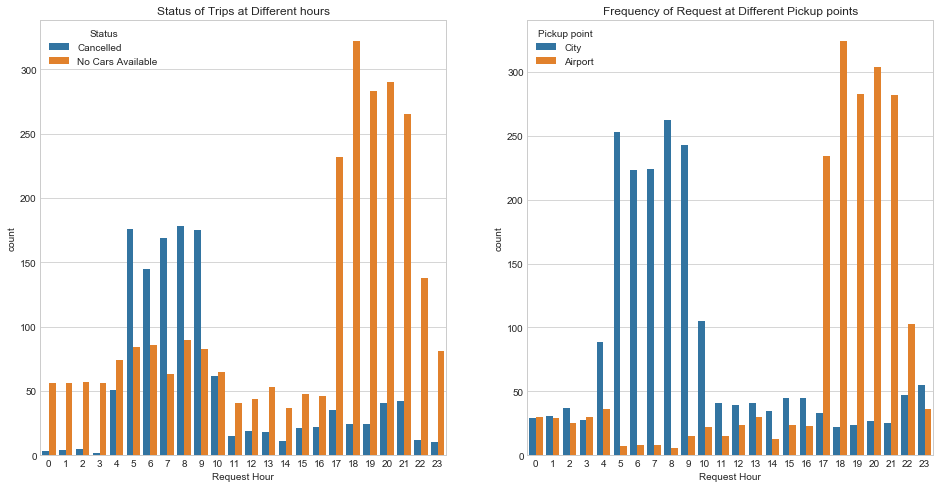

In [26]:
#Requests getting Cancelled or Showing No Cars Available 
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Request Hour',data = filter_status,hue = 'Status')
plt.title('Status of Trips at Different hours')

#Requests getting Cancelled or Showing No Cars Available for Different Pickup points
plt.subplot(1, 2, 2)
sns.countplot(x= 'Request Hour',data = filter_status, hue = 'Pickup point')
plt.title('Frequency of Request at Different Pickup points')

plt.show()

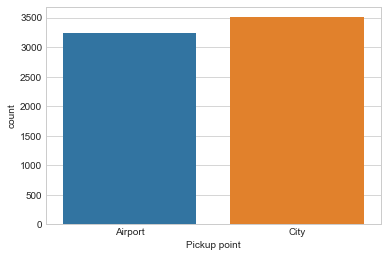

In [27]:
#Number of requests at different Pickup points
sns.countplot(x = 'Pickup point',data = uber)
#plt.yscale('log')
plt.show()

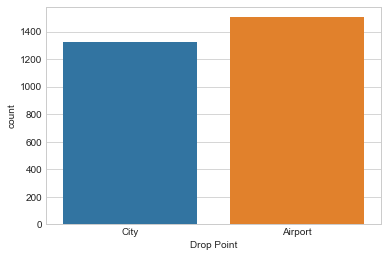

In [28]:
#Number  of Drops at Different locations
sns.countplot(x = 'Drop Point',data = uber)
#plt.yscale('log')
plt.show()

In [29]:
#Creating column  for Drop Timestamp Hour and another data frame for removing Null values in Drop timestamp.
filter_drop = uber[~np.isnat(uber['Drop timestamp'])]
filter_drop['Drop Hour'] = pd.DatetimeIndex(filter_drop['Drop timestamp']).hour

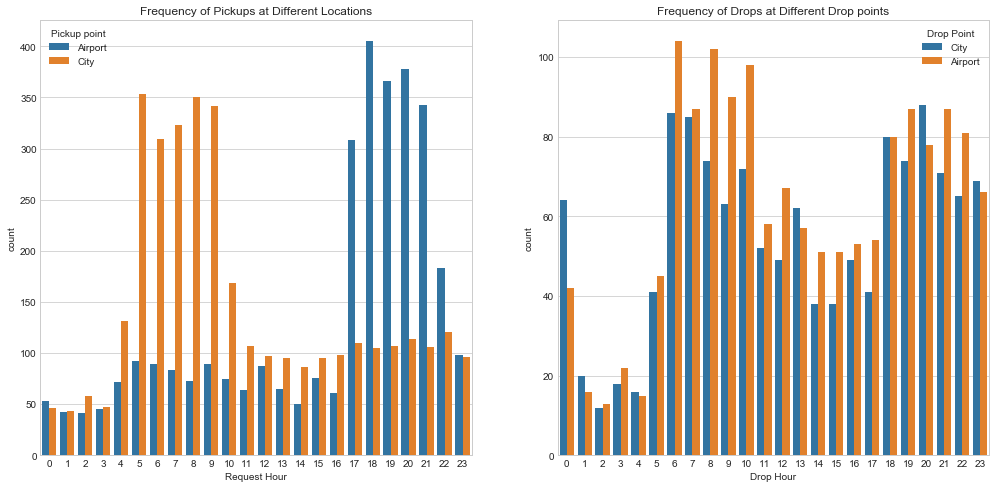

In [63]:
plt.figure(figsize=(17, 8))

plt.subplot(1, 2, 1)
sns.countplot(x = 'Request Hour',data = uber,hue = 'Pickup point')
plt.title('Frequency of Pickups at Different Locations')

plt.subplot(1, 2, 2)
sns.countplot(x= 'Drop Hour',data = filter_drop, hue = 'Drop Point')
plt.title('Frequency of Drops at Different Drop points')

plt.show()

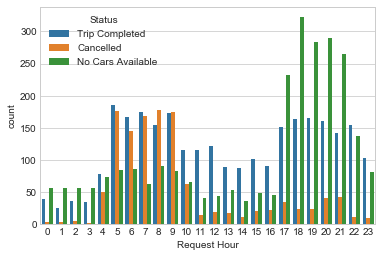

In [31]:
#Demand for Cabs at different hours and their Statuses
sns.set_color_codes("pastel")
sns.countplot( x = "Request Hour", data=uber,hue = 'Status')
plt.show()

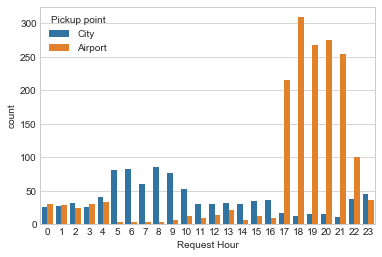

In [36]:
#Statuses of No Cars Available at every hour
No_cars = uber[uber['Status'] == 'No Cars Available']
sns.set_color_codes("pastel")
sns.countplot( x = "Request Hour", data=No_cars,hue = 'Pickup point')
plt.show()

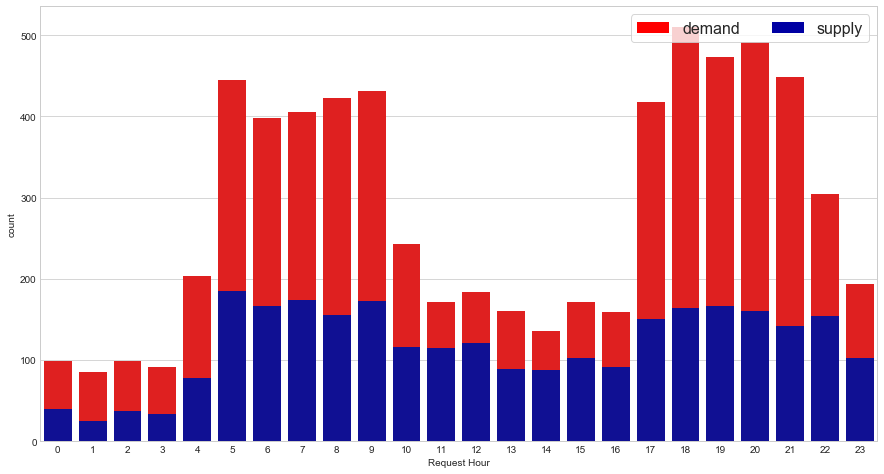

In [54]:
#Plotting Demand-Supply stacked graph for better visualization of Business Problem
plt.figure(figsize=(15, 8))


supply = uber [uber['Status'] == "Trip Completed"]
sns.countplot(x= 'Request Hour', data = uber,color = "red")
sns.countplot(x = 'Request Hour', data = supply , color = '#0000A3',saturation = 0.8)
demand = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
supply = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([demand, supply], ['demand', 'supply'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(True)


plt.show()

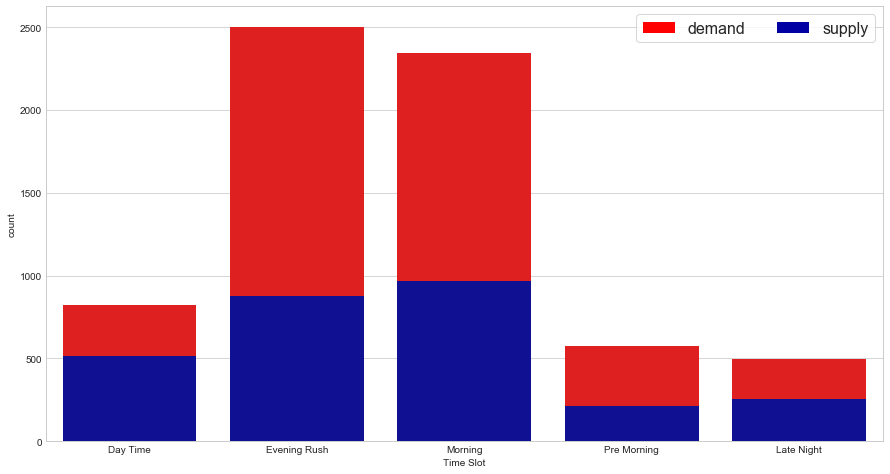

In [64]:
#Plotting Demand-Supply stacked graph for better visualization of Business Problem Timeslot wise
plt.figure(figsize=(15, 8))


supply = uber [uber['Status'] == "Trip Completed"]
sns.countplot(x= 'Time Slot', data = uber,color = "red")
sns.countplot(x = 'Time Slot', data = supply , color = '#0000A3',saturation = 0.8)
demand = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
supply = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([demand, supply], ['demand', 'supply'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(True)


plt.show()

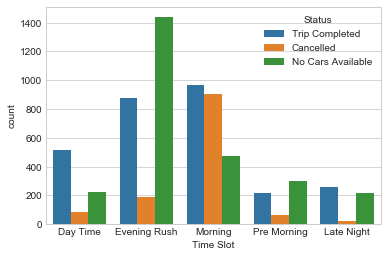

In [33]:
#Plotting Differet requests at every hours wrt Statuses
sns.countplot(x = 'Time Slot',data = uber,hue = 'Status')
plt.show()

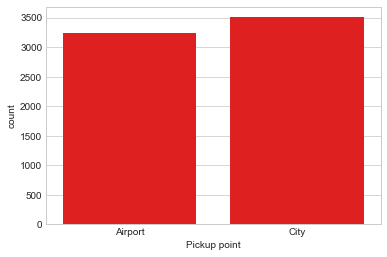

In [44]:
#Pickup for every Location
sns.countplot(x= 'Pickup point', data = uber,color = "red")
